## Introduction: 

Frank Wood and his research team at the University of British Columbia created the PLAICraft project to understand how humans play and interact within virtual environments (Ye et al., 2025). To do this, they required an environment that was sufficiently complex so that the observed behavioural patterns could reflect real-world tendencies. Therefore, they opened a multiplayer Minecraft server and recorded players as they explored, built, communicated, and collaborated within a shared world (Ye et al., 2025). 

Ultimately, the experiment produced two datasets. The **players dataset** contains demographic and background information about each participant, such as name, age, gender, self-reported experience level, etc.. The **sessions dataset** provides detailed records of all the gameplay sessions, allowing researchers to investigate how long each player played, how frequently they returned, and the exact times (day/month/year) at which they connected to the server. Our project will focus on understanding who contributes the most data to PLAICraft. More specifically, we will be investigating the research question: *“Can a player’s age and gender be used to predict the amount of time they spend playing Minecraft in the players dataset?”*.

## Methods for the Analysis

Before undergoing any analysis on the loaded datasets, all of the necessary packages must be loaded into R. 

In [74]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(dplyr)
options(repr.matrix.max.rows = 6)
#source("cleanup.R")

In [75]:
players <- read_csv("https://raw.githubusercontent.com/natlogan6/Dsci100-individual-/refs/heads/main/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


This dataset consists of 196 players and it records each player's name, gaming experience, email, played hours, age, gender, and their subscription status to gaming newsletters. 


Although the data is already tidy, some variables are irrelevant to the research question. To ensure a clear and accurate analysis, we will only select columns for experience, subscription, played_hours, gender, and Age using the select function, as they contribute meaningful information about the types of players on the server, the other variables do not. 


The dataset was also further cleaned by removing entries where played_hours equals 0.0 and where age values are missing. Players with zero recorded hours likely did not engage meaningfully with the game, so including them could distort averages and reduce model accuracy. Likewise, missing age values hinder proper grouping and comparison. Removing these entries leads to cleaner visualizations and more reliable analysis.

In [60]:
player_filtered <- players |>
select (experience, subscribe, played_hours, gender, Age) |> 
filter (played_hours != 0.0) |> 
drop_na (Age, gender, played_hours) |>
mutate(gender = as_factor(gender)) |>
mutate(experience = as_factor (experience))

player_filtered

experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
⋮,⋮,⋮,⋮,⋮
Veteran,TRUE,0.1,Female,44
Veteran,FALSE,0.3,Male,22
Amateur,FALSE,2.3,Male,17


The dataset has now been refined to include only the information relevant to answering the question: “Which types of players are most likely to contribute large amounts of data?” Our analysis will therefore focus on identifying these player categories. A practical way to do this is by examining how various variables influence the played_hours variable, as players with the highest playtime generate the most data. 

Before proceeding, however, it is important to address a key issue in the dataset: some players appear to have misreported their age. For example, the first data point lists an age of 9 years, which is clearly invalid, especially given that the server is restricted to members of our class. Including such anomalies would distort our understanding of the relationship between age group and playtime. To avoid this, we will consider only players aged 15–30 when examining age-related patterns. 

In addition to age, we will analyze playtime in relation to experience level, gender, and subscription status. At this stage, bar graphs will be used to explore these relationships and to identify which variables are most relevant. 

The first graph we produced shows experience level vs. mean hours played. Using the ggplot2 package, we grouped the data by experience level and calculated the average hours played. We then created a bar plot with geom_bar(stat = "identity"), placing experience on the x-axis and mean hours played on the y-axis.

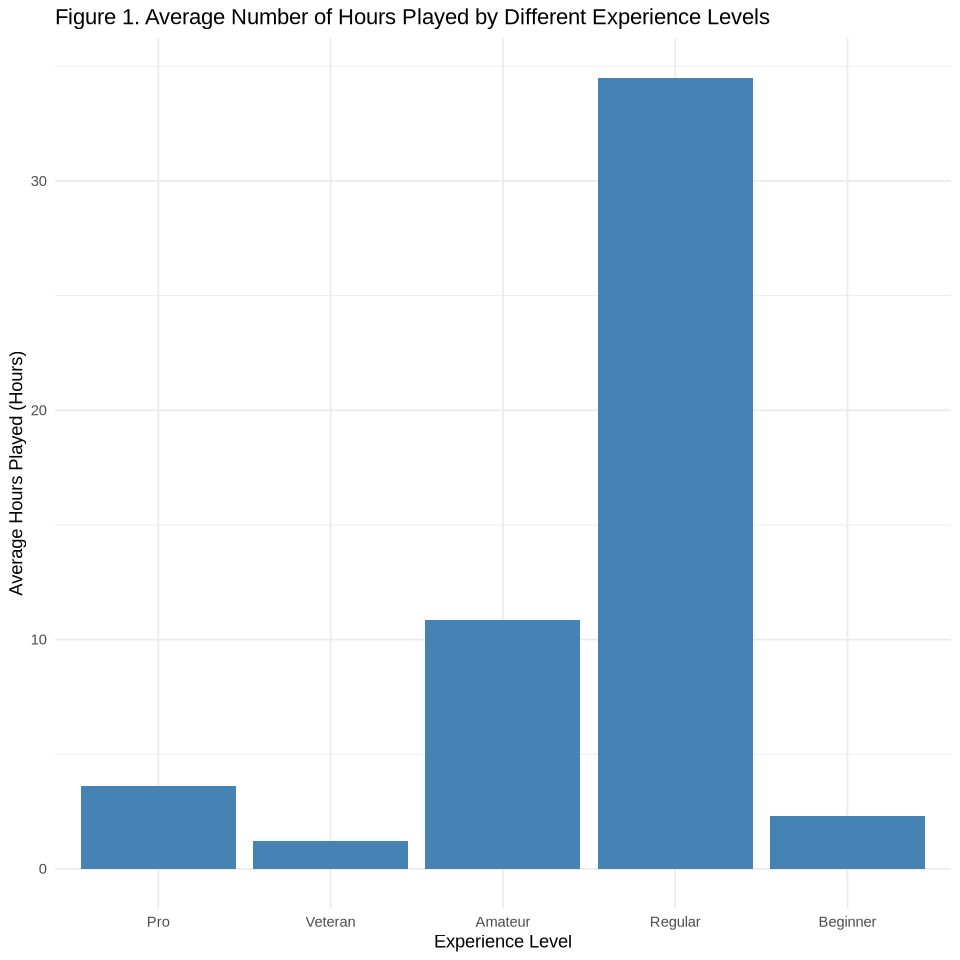

In [87]:
player_data_experience_mean <- player_filtered |>
group_by (experience) |>
summarise(played_hours = mean (played_hours, na.rm = TRUE) )


ggplot (player_data_experience_mean, aes(x = experience, y = played_hours)) +
geom_bar (stat = "identity", fill = "steelblue") +
labs (title = "Figure 1. Average Number of Hours Played by Different Experience Levels",
x = "Experience Level",
y = "Average Hours Played (Hours)") +
theme_minimal()

Figure 1 helps determine that Amateur and Regular players demonstrate higher gameplay hours than average. 

The next plot generated will illustrate subscription status against hours played, with subscriptions on the x-axis and hours on the y-axis.

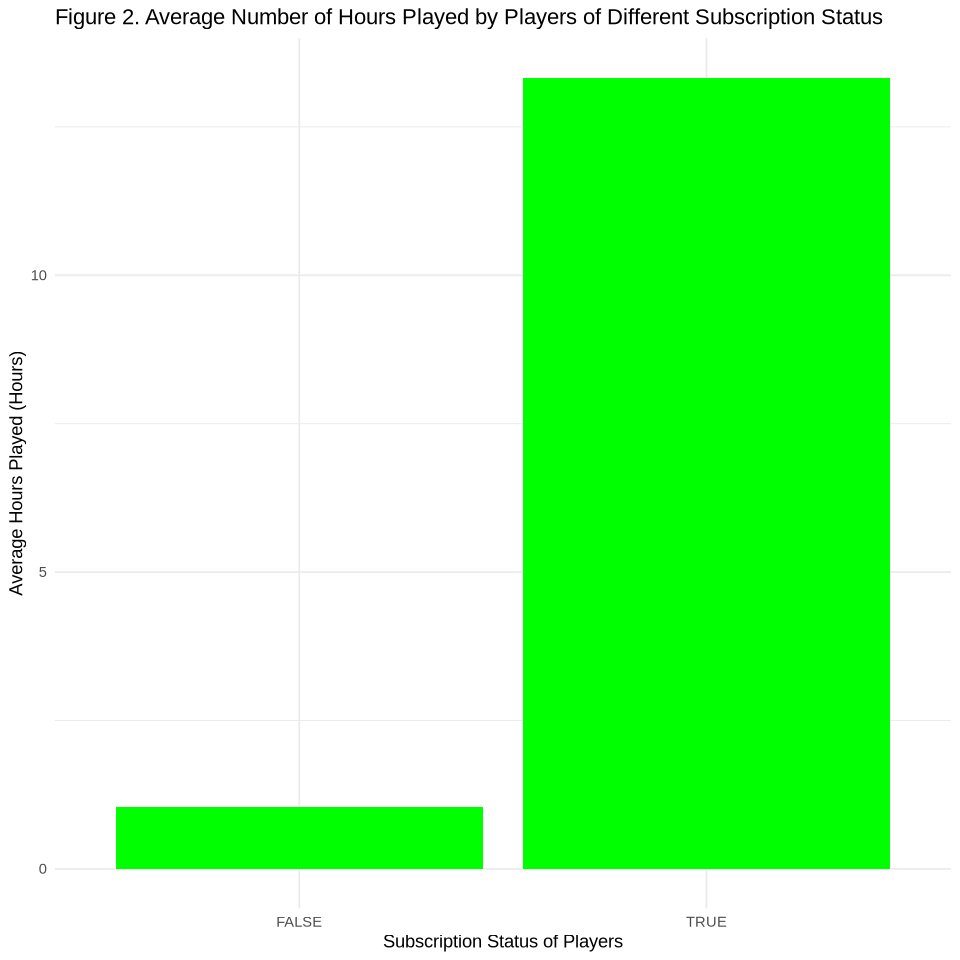

In [88]:
player_data_subscribe_mean <- player_filtered |>
group_by(subscribe) |>
summarise(played_hours = mean(played_hours, na.rm = TRUE))


ggplot(player_data_subscribe_mean, aes(x = subscribe, y = played_hours)) +
geom_bar (stat = "identity",
fill = "green") +
labs (title = "Figure 2. Average Number of Hours Played by Players of Different Subscription Status",
x = "Subscription Status of Players",
y = "Average Hours Played (Hours)") +
theme_minimal()

options(repr.plot.width = 10, repr.plot.height = 8) 

This figure demonstrates that subscribed players contribute considerably more to playtime hours than those who are not subscribed.

The next graph we will generate will illustrate gender identity of the players vs. the average playtime hours.

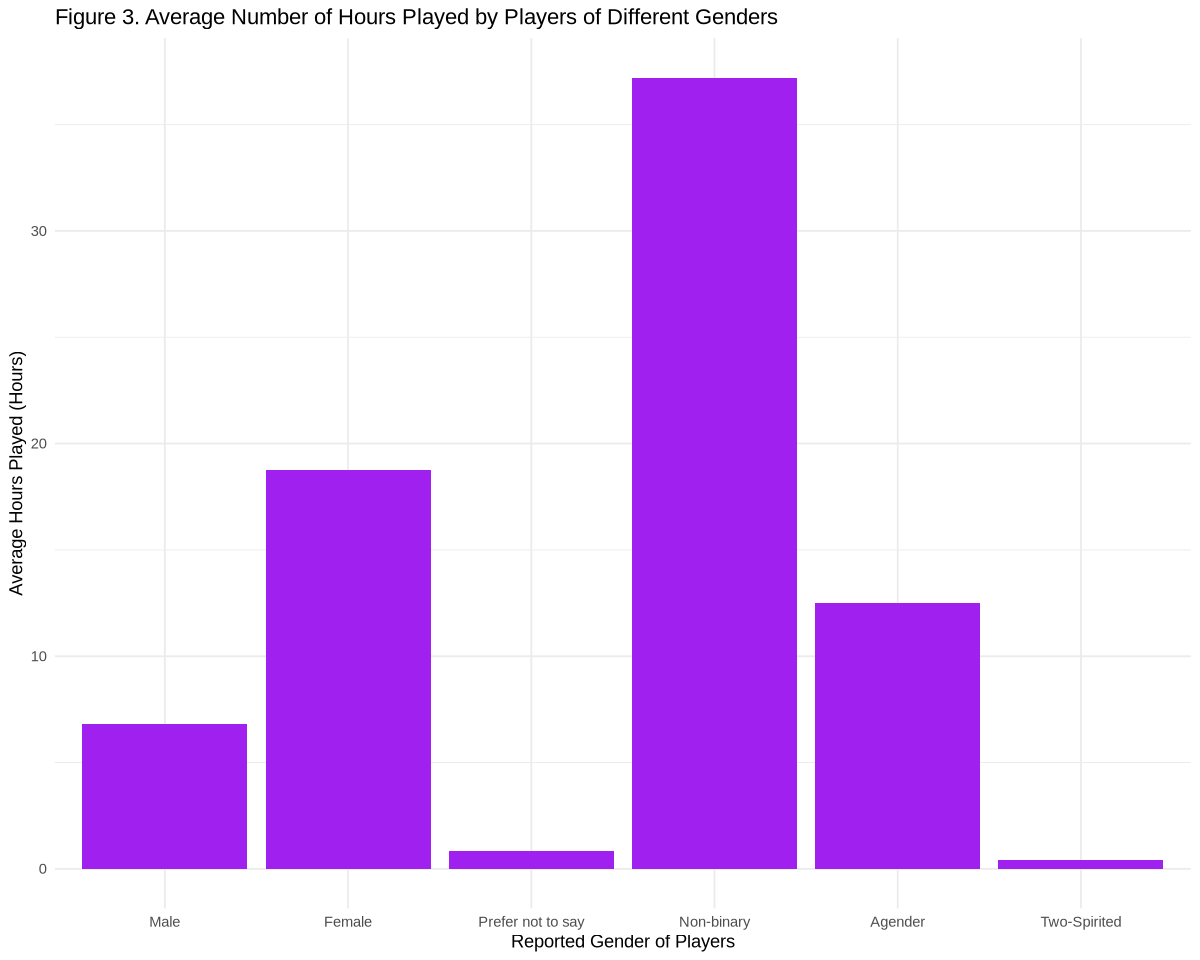

In [91]:
player_data_gender_mean <- player_filtered |> 
group_by (gender) |>
summarise(played_hours = mean (played_hours, na.rm = TRUE))


ggplot(player_data_gender_mean, aes (x = gender, y = played_hours) ) +
geom_bar(stat = "identity", fill = "purple") +
labs (title = "Figure 3. Average Number of Hours Played by Players of Different Genders",
x = "Reported Gender of Players",
y = "Average Hours Played (Hours)") +
theme_minimal()

Figure 3 allows us to determine that non-binary people contribute the most to the dataset, followed by females, agender people, males. The contribution from the other genders was negligible.

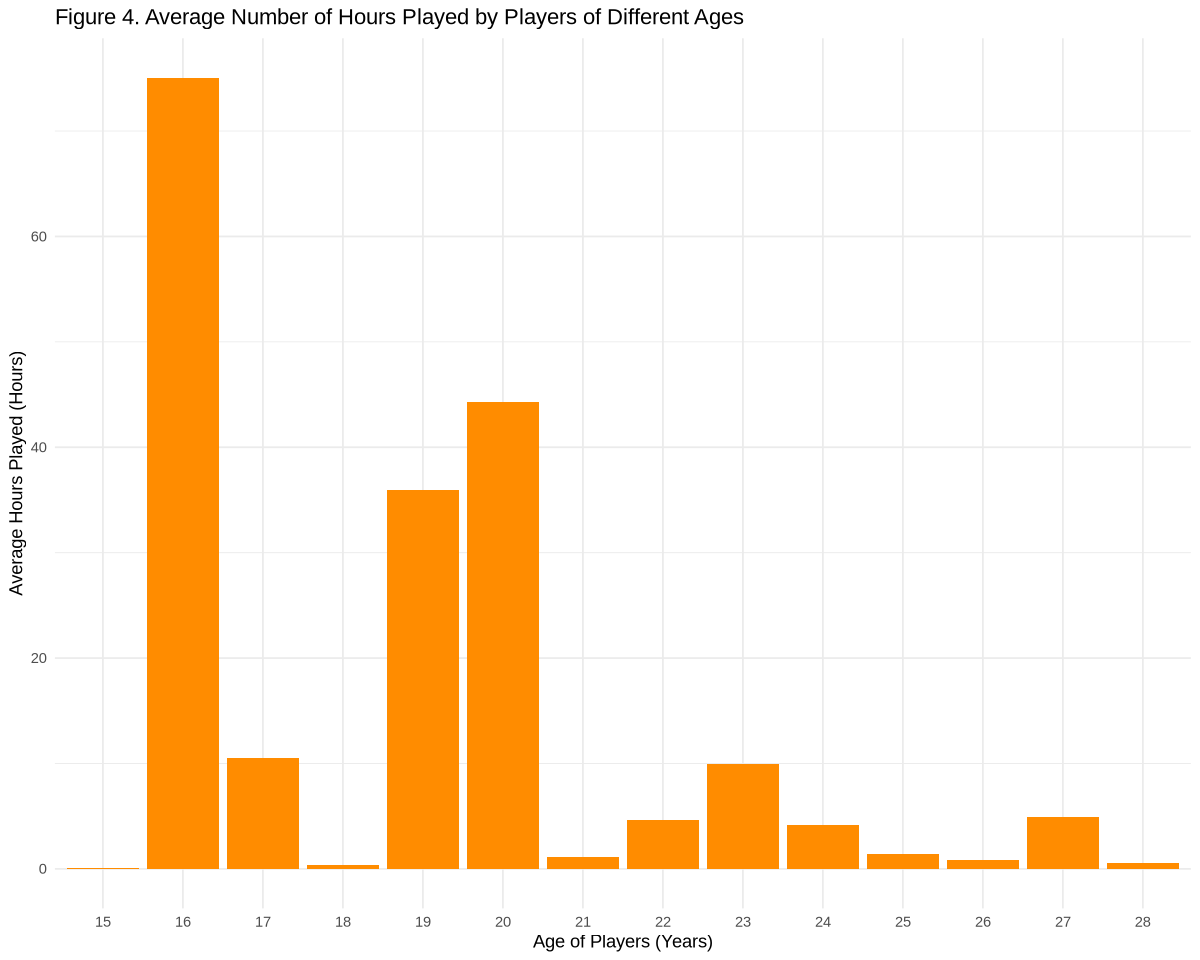

In [92]:
player_data_age_mean <- player_filtered |>
filter (Age >= 15 & Age <= 30) |> 
group_by (Age) |>
summarise (played_hours = mean (played_hours, na.rm = TRUE))


ggplot(player_data_age_mean, aes(x = factor(Age), y = played_hours)) +
geom_bar(stat = "identity", fill = "darkorange") +
labs (title = "Figure 4. Average Number of Hours Played by Players of Different Ages",
x = "Age of Players (Years)",
y = "Average Hours Played (Hours)") +
theme_minimal()

The final graph we produced plots the age vs. average hours played, with age on the x-axis and mean hours played on the y-axis, using the same procedure as the previous visualization.

Although these plots help reveal useful correlations among the variables, we supplemented them with further analyses to support more substantial conclusions. These included regression models designed to predict playtime based on gender and age. Specifically, we chose to use linear regression because we expected a linear relationship for age and playtime and playtime is also a numerical response variable.

## Results and Further Analysis

We first divide the filtered player dataset into a 75% training set and a 25% testing set using stratified sampling on played_hours to ensure both sets have similar playtime distributions. The training set is used to fit the models, and the testing set is used to assess their performance on unseen data. This approach helps us reliably identify which player demographics are associated with higher levels of data contribution.

In [93]:
players_split <- initial_split(player_filtered, prop = 0.75, strata = played_hours) 
players_training <- training(players_split)
players_testing <- testing(players_split)

players_training
players_testing

experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.1,Male,47
Amateur,TRUE,0.2,Male,22
⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,2.7,Non-binary,21
Amateur,TRUE,32.0,Male,22
Amateur,FALSE,2.3,Male,17


experience,subscribe,played_hours,gender,Age
<fct>,<lgl>,<dbl>,<fct>,<dbl>
Veteran,TRUE,3.8,Male,17
Amateur,TRUE,0.7,Female,21
Beginner,TRUE,1.5,Female,25
⋮,⋮,⋮,⋮,⋮
Regular,FALSE,0.1,Male,18
Veteran,TRUE,0.1,Female,44
Veteran,FALSE,0.3,Male,22


The following code fits a linear regression model that predicts the number of hours an individual plays based on their age.

In [94]:
players_recipe <- recipe(played_hours ~ Age, data = player_filtered) 

players_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression") 

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    fit(data = players_training)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          Age  
     16.174       -0.301  


The results indicate that predicted playtime decreases as age increases, suggesting a negative relationship between age and player engagement on the Minecraft server. 

Next, we use the trained model (players_fit) to generate predictions on the test set, merge these predictions with the observed values, and evaluate model performance by comparing predicted and actual played_hours.

In [97]:
players_test_results <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing) |>
    metrics(truth = played_hours, estimate = .pred)

players_test_results 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,42.34182144
rsq,standard,0.02197887
mae,standard,18.07768794


The $R^2$ (rsq) value from this model is approximately 0.14 which shows that age explains about 14% of the variation in the response played_hours, leaving 86% unexplained. Therefore age is not a strong predictor of play time. 

Now we will filter and create a tibble of the maximum and minimum age from the dataset. 

In [98]:
player_age_minimum <- player_filtered |>
    select(Age) |>
    min()

player_age_maximum <- player_filtered |>
    select(Age) |>
    max()

played_hours_prediction <- tibble(Age = c(player_age_minimum, player_age_maximum))
played_hours_prediction

Age
<dbl>
9
58


Next, we use the linear regression results to predict playtime (.pred) for the youngest and oldest players, and then visualize the results by plotting **Age** alongside a red regression line that represents the model’s predicted relationship between age and hours played.

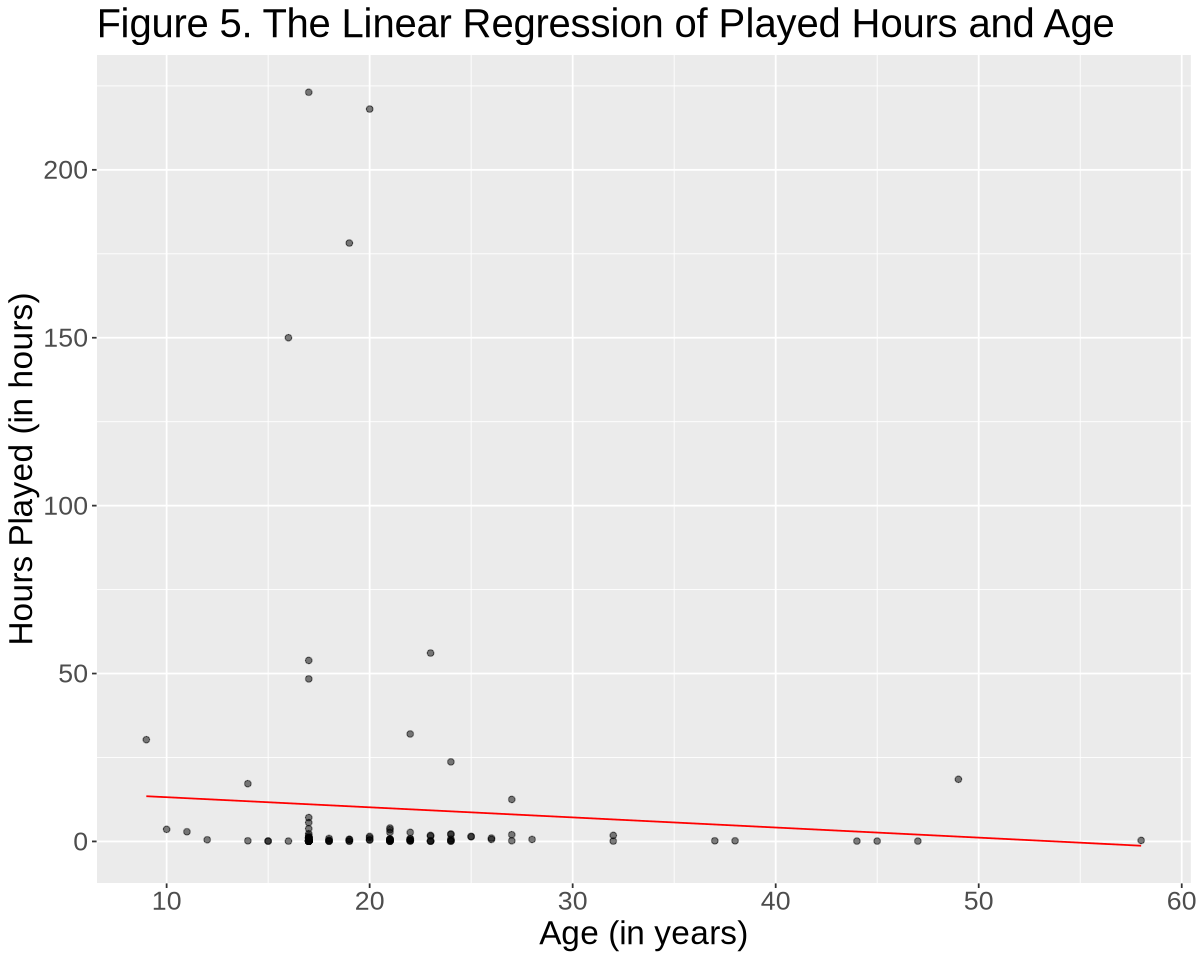

In [99]:
player_predictions <- predict(players_fit, played_hours_prediction) |>
    bind_cols(played_hours_prediction)

age_plot <- ggplot(player_filtered, aes(x = Age, y = played_hours)) +
    geom_point(alpha = 0.5) +
    geom_line(data = player_predictions,
              mapping = aes(x = Age, y = .pred),
              color = "red") +
    xlab("Age (in years)") +
    ylab("Hours Played (in hours)") +
    ggtitle("Figure 5. The Linear Regression of Played Hours and Age") +
    theme(text = element_text(size = 20))
age_plot

The resulting plot shows a slight negative relationship between age and playtime, suggesting that older players tend to spend fewer hours playing. 

Next, following a similar approach, we will create and train a linear regression model to predict played_hours using **gender**.

In [70]:
player_recipe <- recipe(played_hours ~ gender, data = players_training)

player_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression") 

player_fit <- workflow() |>
    add_recipe(player_recipe) |>
    add_model(player_spec) |>
    fit(data = players_training)
player_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)             genderFemale  genderPrefer not to say  
                  4.185                   10.009                   -3.185  
       genderNon-binary            genderAgender  
                 -2.935                    8.315  


The linear regression model predicts played hours relative to male players, who are the baseline at 7.22 hours. Female players are predicted to play 14.60 more hours than males (21.81 hours total), non-binary players 47.89 more hours (55.10 hours total), agender players 5.29 more hours (12.50 hours total), and those who prefer not to disclose their gender 6.29 fewer hours (0.93 hours total).

Next, we will use the trained model to generate predicted playtime values for the testing set and merge these predictions with the actual testing data into a single table.

In [83]:
players_test_results <- players_fit |>
    predict(players_testing) |>
    bind_cols(players_testing)

players_test_results

.pred,experience,subscribe,played_hours,gender,Age
<dbl>,<fct>,<lgl>,<dbl>,<fct>,<dbl>
7.303187,Beginner,TRUE,1.0,Male,17
7.028651,Veteran,FALSE,0.1,Male,18
6.205046,Veteran,TRUE,0.1,Male,21
⋮,⋮,⋮,⋮,⋮,⋮
7.303187,Amateur,TRUE,0.4,Two-Spirited,17
7.303187,Veteran,TRUE,0.1,Non-binary,17
7.028651,Regular,FALSE,0.1,Male,18


Next, we will create a plot to show the actual and predicted playtime for each gender

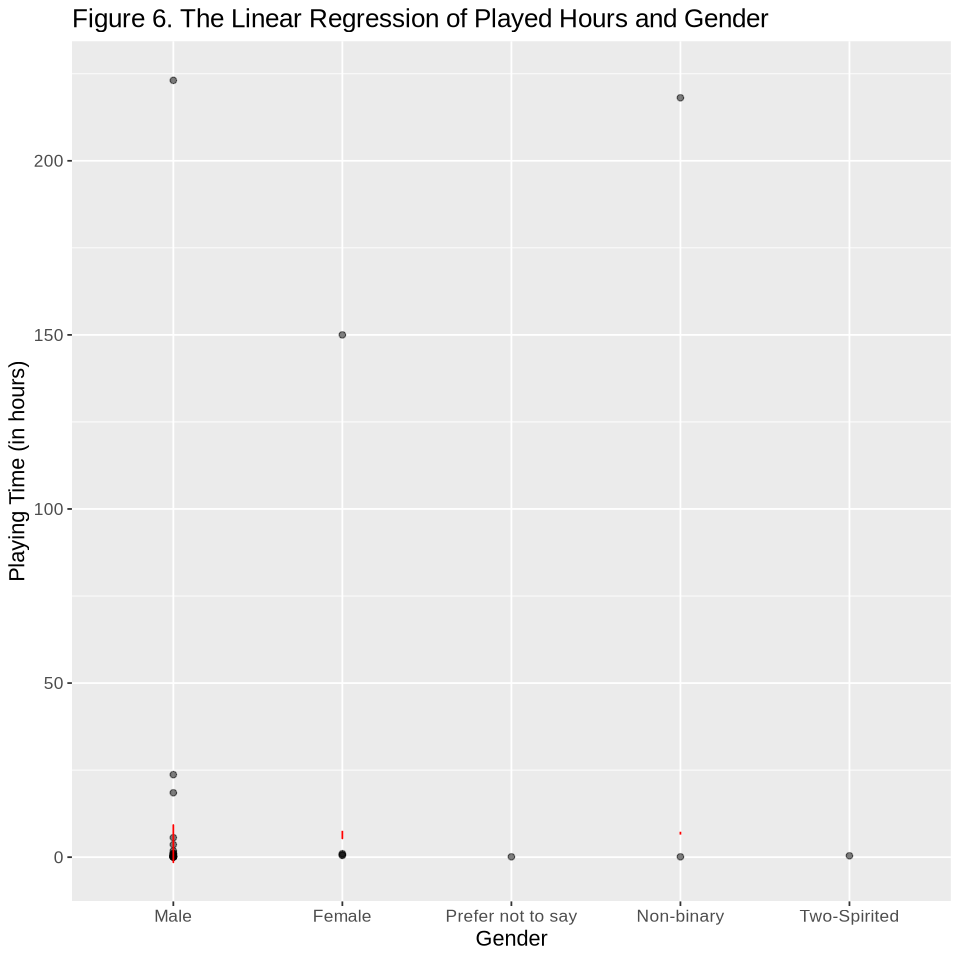

In [84]:
options(repr.plot.width = 8, repr.plot.heigh = 10)
gender_plot <- ggplot(players_test_results, aes(x = gender, y = played_hours)) +
    geom_point(alpha = 0.5)  +
    geom_line(aes(y=.pred), color = "red") + #line
    xlab("Gender") +
    ylab("Playing Time (in hours)") +
    ggtitle("Figure 6. The Linear Regression of Played Hours and Gender") +
    theme(text = element_text(size = 13))

gender_plot

Figure 6 shows the relationship between gender and total hours played. Most players across all gender categories report low playtimes (generally under 10 hours). The Male group displays a wider range, including several higher-playtime values and one extreme outlier around 150 hours. In contrast, the Female and Non-binary groups have consistently low playtimes with no major outliers.

As gender is a categorical variable, we will also perform a regression using one-hot-encoding, which converts the gender categories into indicator variables. *Male* will be used as the baseline category, and the coefficients  for the remaining categories will represent their average difference in played hours with respect to *Male*.

By doing so, we can compare the differences between the two models of linear regression using gender as a predictor variable.

In [85]:
lm.gender=lm(played_hours~gender, data = player_filtered)
summary(lm.gender)

confint(lm.gender, level=0.95)


Call:
lm(formula = played_hours ~ gender, data = player_filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.100  -6.724  -6.624  -4.724 216.276 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)                6.824      4.320   1.580   0.1173  
genderFemale              11.914      9.237   1.290   0.2000  
genderPrefer not to say   -6.004     17.281  -0.347   0.7290  
genderNon-binary          30.376     15.873   1.914   0.0584 .
genderAgender              5.676     37.662   0.151   0.8805  
genderTwo-Spirited        -6.424     37.662  -0.171   0.8649  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.41 on 103 degrees of freedom
Multiple R-squared:  0.04813,	Adjusted R-squared:  0.001926 
F-statistic: 1.042 on 5 and 103 DF,  p-value: 0.3973


,2.5 %,97.5 %
(Intercept),-1.743983,15.39198
genderFemale,-6.405022,30.23321
genderPrefer not to say,-40.275931,28.26793
genderNon-binary,-1.104778,61.85678
genderAgender,-69.017941,80.36994
genderTwo-Spirited,-81.117941,68.26994


The regression showed no significance in relationship between gender and played hours (p > 0.05). The intercept for the baseline category indicates the average hours played for males, which was estimated to be 6.824 hours. *Nonbinary* players did have a higher estimated mean of 30.376 hours however, this difference wasn't statistically significant. The other gender categories also did not differ meaningfully from the *Male* category. The lack of significance is also confirmed by the 95% confidence intervals, which all include zero and negative values.

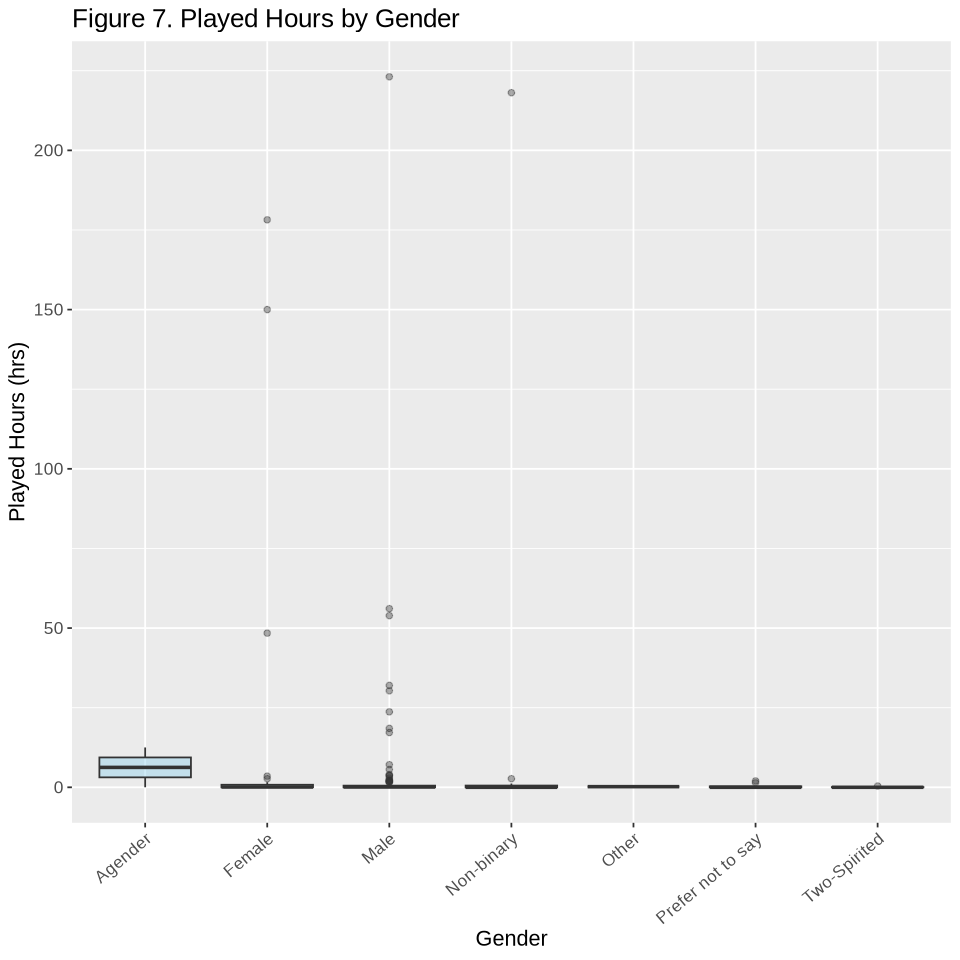

In [86]:
ggplot(players, aes(x = gender, y = played_hours)) +
    geom_boxplot(fill = "skyblue", alpha = 0.4) +
    theme(axis.text.x = element_text(angle = 40, hjust = 1)) +
    ggtitle("Figure 7. Played Hours by Gender") +
    xlab("Gender") +
    ylab("Played Hours (hrs)") +
    theme(text = element_text(size = 13))
options(repr.plot.width = 8, repr.plot.height = 8)

Figure 7 shows box-and-whisker plots for all the gender categories, illustrating the minimum, first quartile, median, third quartile, maximum, and any outliers in the data. Among all the gender groups, *Agender* is the only group with a visible boxplot, whereas the other categories appear as a single horizontal line with occasional outliers. Overall, the figure suggests that most players across all genders recorded relatively low hours, with a few individuals showing unusually high played hours. 

## Discussion

The purpose of this project was to examine which types of players contribute the most gameplay hours to the Minecraft server dataset and to determine whether characteristics such as experience level, subscription status, gender, and age could reliably predict playtime. After exploring the relationship between each variable with played hours, we decided that age and gender are worth exploring further into how much playing time can be explained by them using regressions. Across the analyses, several clear patterns emerged, along with important limitations in the predictive models used. 

Our result showed that neither age nor gender had a strong relationship with playtime. While the initial summaries suggested differences across gender groups, particularly the observation that non-binary players displayed high average hours, the regression analysis demonstrated that these differences were not statistically significant once variability in the data was taken into account. The large confidence intervals and substantial noise in the dataset indicate that gender does not reliably predict gameplay hours. 

Similarly, although younger players tended to contribute more hours, the linear regression model using age performed poorly, explaining only about 14% of the variation in playtime. The negative slope of the age model suggests that older players generally play less, but the weak R² value suggests that this relationship is too unstable to be used predictively. In both cases, demographic variables provided little explanatory power relative to behavioral ones. 

These findings only partially aligned with our expectations. Before analyzing the data, we anticipated that men would contribute more playtime, based on common assumptions about gaming habits. The results did not support this expectation, as gender differences were small, statistically insignificant, and heavily influenced by outliers. We also expected that teenagers and young adults would play more than older players, and although this trend appeared visually, it did not translate into strong predictive capacity. These results suggest that simple demographic profiling such as age and gender does not effectively capture the patterns of play within this dataset. 

Through the first exploration step, we observed that the strongest and most consistent findings came from the descriptive analyses of experience level and subscription status. Players classified as Amateur and Regular demonstrated the highest average playtime, suggesting that individuals who possess an intermediate level of familiarity with the server tend to play more than absolute beginners or highly advanced players. This pattern may reflect an engagement in which players remain actively invested as they build skills but have not yet plateaued or lost novelty. Subscribed players also played substantially more hours than non-subscribed players. Since subscribing requires an intentional decision and financial commitment, this group is understandably more invested in the server environment, and their elevated playtime reflects that stronger engagement. These variables, like experience and subscription, could therefore be more meaningful indicators of data contribution in the dataset than age and gender, and may be worth investigating further into. 

At the same time, the weak predictive value of gender and age emphasizes that demographic variables provide limited insight into gameplay behavior. Meaningful prediction of playtime likely requires deeper behavioral data, such as activity logs, session frequency, or participation in in-game social events, rather than static demographic attributes. 

Finally, these results point toward several promising directions for future research. More complex behavioral features may reveal stronger patterns of engagement, and a longitudinal approach would help determine whether playtime remains consistent for individuals over time or fluctuates according to external factors. Understanding what motivates players to subscribe could also provide valuable information for increasing server engagement more broadly. Overall, while this project demonstrated that certain behavioral variables are strongly associated with playtime, it also showed that demographic characteristics alone are insufficient predictors, highlighting the importance of collecting richer behavioral information to better understand player activity. 

## References



Ye, Y, Weilbach, C. D., Wojciechowska, M. E., Zhang, Y., & Wood, F. (2025). PLAICraft Large-Scale Time-Aligned Vision-  Speech-Action Dataset for Embodied AI. arXiv:2505. 12707v1 [cs.LG]. https://arxiv.org/html/2505.12707v1 